In [4]:
import os
import pandas as pd
import numpy as np
import tarfile
#!pip install opencv-contrib-python
import cv2
from scipy import misc
import imageio
from PIL import Image
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [5]:
# #unzip file UTKFace.tar. Only run once!
# my_tar = tarfile.open('UTKFace.tar')
# my_tar.extractall('./UTKFace') # specify which folder to extract to
# my_tar.close()

In [6]:
#going into the UTKFace directory
os.chdir('UTKFace')

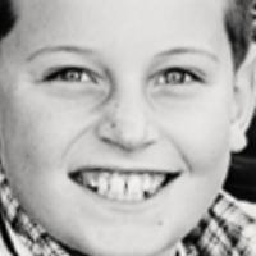

In [7]:
#display one of the images after resizing
im = Image.open('10_0_0_20170110220447314.jpg.chip.jpg').resize((256,256))
im

In [8]:
#getting the image names
im_names = os.listdir()
len(im_names)

23708

In [9]:
size = len(im_names)

### Data Defination

The labels of each face image is embedded in the file name, 
formated like `[age]_[gender]_[race]_[date&time].jpg`



*   `[age]` is an integer from 0 to 116, indicating the age
*   `[gender]` is either 0 (male) or 1 (female)

*   `[race]` is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
*   `[date&time]` is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [12]:
X_data =[]
for file in im_names:
    face = imageio.imread(file)
    face = cv2.resize(face, (64, 64) )
    X_data.append(face)

In [13]:
X = np.squeeze(X_data)
X.shape

(23708, 64, 64, 3)

### Normalizing data

In [14]:
X = X.astype('float32')
X /= 255


In [15]:
#create Clases for 3 target variables
gender = [i.split('_')[1] for i in im_names]
age = [i.split('_')[0] for i in im_names]
race = [i.split("_")[2] for i in im_names]

### Gender Clases

In [16]:
gen_classes = []
for i in gender:
    i = (i)
    gen_classes.append(i)

### Age Group Clases
#### Children (1-14)--------> CLASS 0
#### Youth (14-25)----------> CLASS 1
#### ADULTS (25-40)---------> CLASS 2
#### Middle age (40-60)----- >CLASS 3
#### Very Old (>60)---------> CLASS 4

In [17]:
age_classes = []
for i in age:
    i = int(i)
    if i <= 14:
        age_classes.append(0)
    if (i>14) and (i<=25):
        age_classes.append(1)
    if (i>25) and (i<40):
        age_classes.append(2)
    if (i>=40) and (i<60):
        age_classes.append(3)
    if i>=60:
        age_classes.append(4)

### Race Clases

#### White------>Class 0
#### Black------>Class 1
#### Asian------>Class 2
#### Indian----->Class 3
#### Other------>Class 4

In [21]:
race_classes = []
for i in race:
    i = int(i[0])
    race_classes.append(i)



In [22]:
len(race_classes)

23708

### Data Exploration

Text(0, 0.5, 'Frequency')

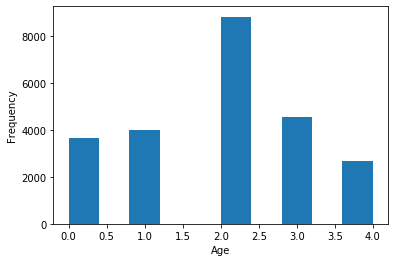

In [23]:
#Histogram of ages in the dataset
%matplotlib inline
plt.hist(age_classes)
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

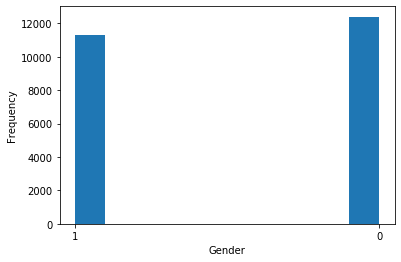

In [24]:
#Histogram of gender in the dataset
%matplotlib inline
plt.hist(gen_classes)
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

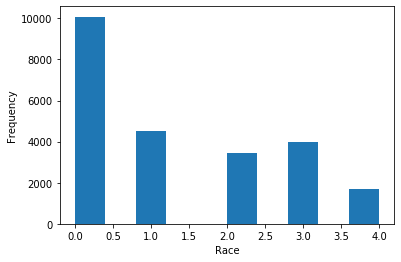

In [25]:
#Histogram of gender in the dataset
%matplotlib inline
plt.hist(race_classes)
plt.xlabel('Race')
plt.ylabel('Frequency')

Gender: 0 Age: 28 Race: 3


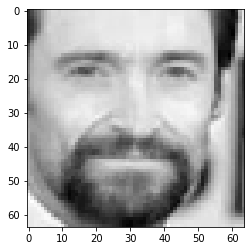

In [26]:
# function for displaying images with age and gender
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap("gray")
    plt.show()
idx = 500
test = X_data[idx]
print("Gender:",gender[idx],"Age:",age[idx],"Race:",race[idx])
display(test)

In [27]:
X.shape

(23708, 64, 64, 3)

In [28]:
age_classes[:10]

[0, 2, 4, 2, 0, 3, 1, 1, 2, 2]

In [29]:
age_labels = to_categorical(age_classes, num_classes=5)

In [30]:
age_labels[:10]

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [31]:
race_classes[:10]

[2, 1, 0, 0, 2, 1, 0, 0, 3, 3]

In [32]:
race_labels = to_categorical(race_classes, num_classes=5)

In [33]:
race_labels[:10]

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [34]:
gen_classes[:10]

['1', '0', '1', '1', '1', '0', '1', '0', '0', '0']

In [35]:
gen_labels = to_categorical(gen_classes,num_classes=2)
gen_labels[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### Target Variable 
#### 1. Gender(1 Character: 0)
#### 2. Age(Next 5 Character: 1-5)
#### 3. Race(Next 5 Character: 6-10)
#### y is 12 character

In [36]:
y = np.column_stack((gen_labels,age_labels,race_labels))


In [39]:
y[10]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Gender Target Variable

In [43]:
y_train[:,0:2]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

### Age Target Variable

In [44]:
y_train[:,2:7]

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

### Race Target Varible

In [45]:
y_train[:,7:12]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

# Data Modeling

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle  = True)
print("Samples in Training:",X_train.shape[0])
print("Samples in Testing:",X_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [41]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18966, 64, 64, 3), (18966, 12), (4742, 64, 64, 3), (4742, 12))

In [42]:
y_train[:]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## 1. Neural network Model

In [46]:
inputs = Input(shape=(64,64,3))
x = Dropout(0.25)(inputs)
flat = Flatten()(x)

age_model = Dense(128, activation='relu')(flat)
age_model = Dense(2, activation='softmax')(age_model)

gender_model = Dense(128, activation='relu')(flat)
gender_model = Dense(5, activation='softmax')(gender_model)

race_model = Dense(128,activation="relu")(flat)
race_model = Dense(5,activation="softmax")(race_model)

In [47]:
model = Model(inputs=inputs, outputs=[age_model,gender_model,race_model])
model.compile(optimizer = 'adam', loss =['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'],metrics=['accuracy'])

In [48]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 64, 64, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 12288)        0           dropout_1[0][0]                  
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          1572992     flatten_1[0][0]                  
____________________________________________________________________________________________

In [49]:
#training the model
h = model.fit(X_train,[y_train[:,0:2],y_train[:,2:7],y_train[:,7:12]],
              validation_data=(X_test,[y_test[:,0:2],y_test[:,2:7],y_test[:,7:12]]),
              epochs = 10, batch_size=64,shuffle = True)

Train on 18966 samples, validate on 4742 samples
Epoch 1/10
18966/18966 [==============================] - 17s 909us/step - loss: 3.4561 - dense_2_loss: 0.6196 - dense_4_loss: 1.4906 - dense_6_loss: 1.3447 - dense_2_accuracy: 0.7226 - dense_4_accuracy: 0.4301 - dense_6_accuracy: 0.5200 - val_loss: 2.7899 - val_dense_2_loss: 0.4369 - val_dense_4_loss: 1.2540 - val_dense_6_loss: 1.0980 - val_dense_2_accuracy: 0.8167 - val_dense_4_accuracy: 0.4544 - val_dense_6_accuracy: 0.5875
Epoch 2/10
18966/18966 [==============================] - 16s 860us/step - loss: 2.6329 - dense_2_loss: 0.4327 - dense_4_loss: 1.1686 - dense_6_loss: 1.0310 - dense_2_accuracy: 0.8054 - dense_4_accuracy: 0.4995 - dense_6_accuracy: 0.6247 - val_loss: 2.5819 - val_dense_2_loss: 0.3837 - val_dense_4_loss: 1.2212 - val_dense_6_loss: 0.9792 - val_dense_2_accuracy: 0.8372 - val_dense_4_accuracy: 0.5059 - val_dense_6_accuracy: 0.6645
Epoch 3/10
18966/18966 [==============================] - 16s 848us/step - loss: 2.4649 -

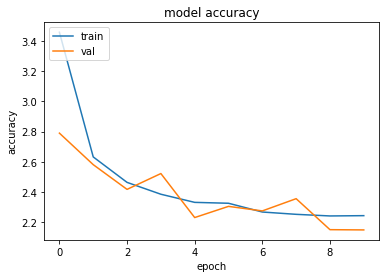

In [50]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
scores = model.evaluate(X_test,[y_test[:,0:2],y_test[:,2:7],y_test[:,7:12]], batch_size=64)

4742/4742 [==============================] - 0s 79us/step


In [52]:
scores

[2.1510335593623786,
 0.3488538861274719,
 1.0159175395965576,
 0.785155713558197,
 0.8456347584724426,
 0.5651623606681824,
 0.7304934859275818]

In [53]:
print(model.metrics_names)

['loss', 'dense_2_loss', 'dense_4_loss', 'dense_6_loss', 'dense_2_accuracy', 'dense_4_accuracy', 'dense_6_accuracy']


## 2. CNN Model

In [54]:
inputs = Input(shape=(64,64,3))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)#62*62*32
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)#60*60*64
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)#30*30*64
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)#28*28*128
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)#14*14*128
conv4 = Conv2D(256,kernel_size=(3,3),activation= "relu")(pool2)#12*12*256
pool3 = MaxPooling2D(pool_size=(2, 2))(conv4)#6*6*256
x = Dropout(0.25)(pool3)
flat = Flatten()(x)
#64*64*3-->62*62*32-->60*60*64-->30*30*64-->28*28*128-->14*14*128-->12*12*256-->6*6*256

dropout = Dropout(0.5)
age_model = Dense(256, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(128, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(16, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(2, activation='softmax')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(256, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(128, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(5, activation='softmax')(gender_model)


dropout = Dropout(0.5)
race_model = Dense(256, activation='relu')(flat)
race_model = dropout(race_model)
race_model = Dense(128, activation='relu')(race_model)
race_model = dropout(race_model)
race_model = Dense(32, activation='relu')(race_model)
race_model = dropout(race_model)
race_model = Dense(16, activation='relu')(race_model)
race_model = dropout(race_model)
race_model = Dense(5, activation='softmax')(race_model)

In [55]:
model_cnn = Model(inputs=inputs, outputs=[age_model,gender_model,race_model])
model_cnn.compile(optimizer = 'adam',
                  loss =['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'],
                  metrics=['accuracy'])


In [56]:
model_cnn.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 60, 60, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 30, 30, 64)   0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [57]:
h = model_cnn.fit(X_train,[y_train[:,0:2],y_train[:,2:7],y_train[:,7:12]],
                  validation_data=(X_test,[y_test[:,0:2],y_test[:,2:7],y_test[:,7:12]]),
                  epochs = 10, batch_size=128,shuffle = True)

Train on 18966 samples, validate on 4742 samples
Epoch 1/10
18966/18966 [==============================] - 125s 7ms/step - loss: 3.7575 - dense_11_loss: 0.6923 - dense_16_loss: 1.5628 - dense_21_loss: 1.5025 - dense_11_accuracy: 0.5199 - dense_16_accuracy: 0.3490 - dense_21_accuracy: 0.4054 - val_loss: 3.6547 - val_dense_11_loss: 0.6775 - val_dense_16_loss: 1.5040 - val_dense_21_loss: 1.4694 - val_dense_11_accuracy: 0.5162 - val_dense_16_accuracy: 0.3690 - val_dense_21_accuracy: 0.4142
Epoch 2/10
18966/18966 [==============================] - 122s 6ms/step - loss: 3.5364 - dense_11_loss: 0.5885 - dense_16_loss: 1.5138 - dense_21_loss: 1.4325 - dense_11_accuracy: 0.6883 - dense_16_accuracy: 0.3716 - dense_21_accuracy: 0.4295 - val_loss: 3.2321 - val_dense_11_loss: 0.4315 - val_dense_16_loss: 1.4220 - val_dense_21_loss: 1.3769 - val_dense_11_accuracy: 0.7868 - val_dense_16_accuracy: 0.4502 - val_dense_21_accuracy: 0.4178
Epoch 3/10
18966/18966 [==============================] - 123s 6ms/

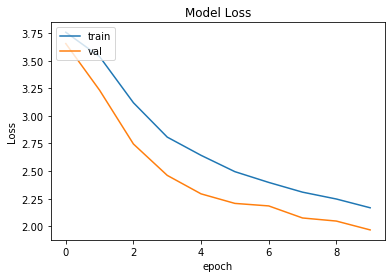

In [58]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
scores = model_cnn.evaluate(X_test,[y_test[:,0:2],y_test[:,2:7],y_test[:,7:12]], batch_size=128)

4742/4742 [==============================] - 9s 2ms/step


In [60]:
scores

[1.966966962271328,
 0.2731856405735016,
 0.9661027789115906,
 0.743797779083252,
 0.8909742832183838,
 0.6014339923858643,
 0.757908046245575]

In [61]:
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])
# print('Test loss:', scores[2])
# print('Test accuracy:', scores[3])
# print('Test loss:', scores[4])
# print('Test accuracy:', scores[5])
# print('Test loss:', scores[6])

In [62]:
print(model.metrics_names)

['loss', 'dense_2_loss', 'dense_4_loss', 'dense_6_loss', 'dense_2_accuracy', 'dense_4_accuracy', 'dense_6_accuracy']


In [63]:
labels_age =["CHILD",  # index 0
        "YOUTH",      # index 1
        "ADULT",     # index 2 
        "MIDDLEAGE",        # index 3 
        "OLD",         # index 4
        ]

In [64]:
labels_race =["White",  # index 0
        "Black",      # index 1
        "Asian",     # index 2 
        "Indian",        # index 3 
        "Other",         # index 4
        ]


In [65]:
labels_gender =["Male",  # index 0
        "Female",      # index 1
        ]

In [66]:
len(y_test[4741])

12

In [67]:
y_test.shape

(4742, 12)

In [68]:
y_hat_cnn = model_cnn.predict(X_test)

In [69]:
y_hat_gender = y_hat_cnn[0]

In [70]:
y_hat_age = y_hat_cnn[1]

In [71]:
y_hat_race = y_hat_cnn[2]

In [72]:
np.argmax(y_hat_race[169])

3

In [73]:
(y_test[300][1])

1.0

In [74]:
y_hat_race[300]

array([0.29854554, 0.16429967, 0.07042455, 0.33663806, 0.13009222],
      dtype=float32)

In [75]:
y_hat_cnn[0][500]

array([9.999753e-01, 2.466074e-05], dtype=float32)

In [76]:
y_hat_cnn[2][500]

array([9.9847466e-01, 3.8896023e-06, 8.4289684e-05, 2.1055297e-04,
       1.2265289e-03], dtype=float32)

In [77]:
np.argmax(y_hat_age[1000])

0

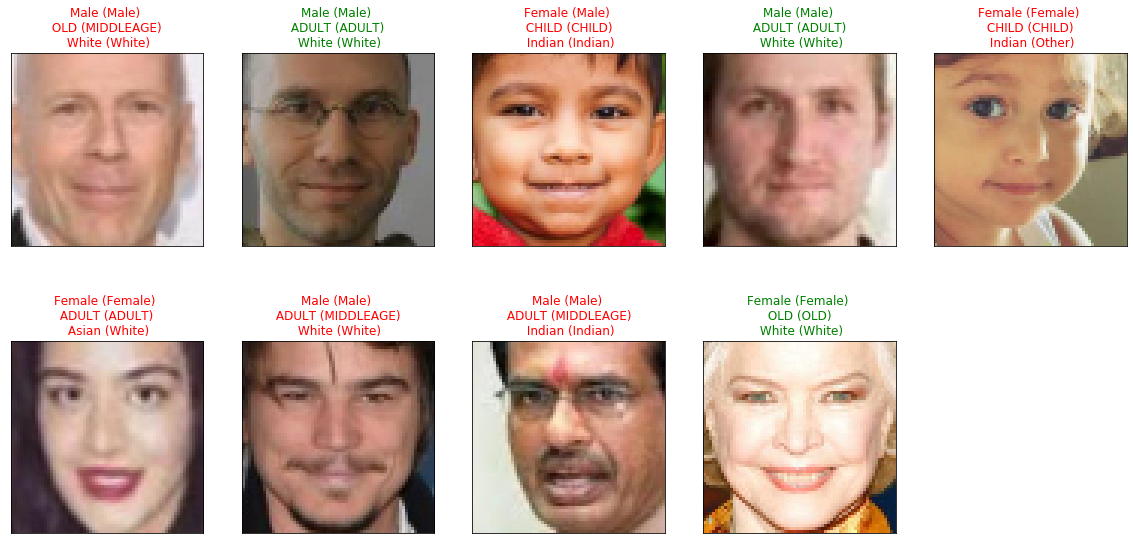

In [78]:
indexes = [500,59,600,100,300,150,23,256,405]
#y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 15))
for i, index in enumerate(indexes):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index_gen = np.argmax(y_hat_gender[index])
    true_index_gen = np.argmax(y_test[index][0:2])
    predict_index_age = np.argmax(y_hat_age[index])
    true_index_age = np.argmax(y_test[index][2:7])
    predict_index_race = np.argmax(y_hat_race[index])
    true_index_race = np.argmax(y_test[index][7:12])
    
    
    # Set the title for each image
    ax.set_title("{} ({}) \n {} ({}) \n {} ({})".format(labels_gender[predict_index_gen], labels_gender[true_index_gen],
                                                  labels_age[predict_index_age],labels_age[true_index_age],
                                                  labels_race[predict_index_race], labels_race[true_index_race]),
                                                    color=("green" if (predict_index_gen == true_index_gen)
                                                                       &(predict_index_age == true_index_age)
                                                                       &(predict_index_race == true_index_race)
                                                                       else "red"))
    
    
    
    

## 3. Transfer Learning Model

In [85]:
X_data_vgg =[]
for file in im_names:
    face = imageio.imread(file)
    face = cv2.resize(face, (224, 224) )
    X_data_vgg.append(face)

In [86]:
X_vgg = np.squeeze(X_data_vgg)
X_vgg.shape

(23708, 224, 224, 3)

In [87]:
# normalize data
X_vgg = X_vgg.astype('float32')
X_vgg /= 255

In [88]:

X_train, X_test, y_train, y_test = train_test_split(X_vgg, y, test_size=0.2,shuffle  = True)
print("Samples in Training:",X_train.shape[0])
print("Samples in Testing:",X_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [89]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18966, 224, 224, 3), (18966, 12), (4742, 224, 224, 3), (4742, 12))

In [90]:
from keras_vggface.vggface import VGGFace

In [91]:
input_tensor = Input(shape=(224, 224, 3))
vggface = VGGFace(model='vgg16',weights="vggface",input_tensor=input_tensor)
for layer in vggface.layers:
    layer.trainable = False

580075520/580070376 [==============================] - 18s 0us/step


In [92]:
layer_dict = dict([(layer.name, layer) for layer in vggface.layers])
layer_dict

{'input_3': <keras.engine.input_layer.InputLayer at 0x2c3baec50>,
 'conv1_1': <keras.layers.convolutional.Conv2D at 0x2c3baef10>,
 'conv1_2': <keras.layers.convolutional.Conv2D at 0x15c9a3490>,
 'pool1': <keras.layers.pooling.MaxPooling2D at 0x1a3941c90>,
 'conv2_1': <keras.layers.convolutional.Conv2D at 0x14d12b950>,
 'conv2_2': <keras.layers.convolutional.Conv2D at 0x14cf69d10>,
 'pool2': <keras.layers.pooling.MaxPooling2D at 0x15c1095d0>,
 'conv3_1': <keras.layers.convolutional.Conv2D at 0x14cec9f50>,
 'conv3_2': <keras.layers.convolutional.Conv2D at 0x1a3945890>,
 'conv3_3': <keras.layers.convolutional.Conv2D at 0x1a3945e90>,
 'pool3': <keras.layers.pooling.MaxPooling2D at 0x1a394aad0>,
 'conv4_1': <keras.layers.convolutional.Conv2D at 0x1a394e590>,
 'conv4_2': <keras.layers.convolutional.Conv2D at 0x1a3954f50>,
 'conv4_3': <keras.layers.convolutional.Conv2D at 0x1a3958890>,
 'pool4': <keras.layers.pooling.MaxPooling2D at 0x1a395ec10>,
 'conv5_1': <keras.layers.convolutional.Conv2D

In [93]:
x = layer_dict['pool5'].output

In [94]:
x.shape

TensorShape([None, 7, 7, 512])

In [95]:
K.image_data_format="channel_last"

In [96]:
flat = Flatten()(x)
dropout = Dropout(0.5)
age_model = Dense(256, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(128, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(16, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(2, activation='softmax')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(256, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(128, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(5, activation='softmax')(gender_model)


dropout = Dropout(0.5)
race_model = Dense(256, activation='relu')(flat)
race_model = dropout(race_model)
race_model = Dense(128, activation='relu')(race_model)
race_model = dropout(race_model)
race_model = Dense(32, activation='relu')(race_model)
race_model = dropout(race_model)
race_model = Dense(16, activation='relu')(race_model)
race_model = dropout(race_model)
race_model = Dense(5, activation='softmax')(race_model)

In [97]:
model_cnn_vgg = Model(inputs=input_tensor, outputs=[age_model,gender_model,race_model])
for layer in model_cnn_vgg.layers[:22]:
    layer.trainable = False
    model_cnn_vgg.compile(optimizer = 'adam',
                  loss =['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'],
                  metrics=['accuracy'])



In [98]:
model_cnn_vgg.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 224, 224, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 224, 224, 64) 36928       conv1_1[0][0]                    
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 112, 112, 64) 0           conv1_2[0][0]                    
____________________________________________________________________________________________

In [99]:
h_vgg = model_cnn_vgg.fit(X_train,[y_train[:,0:2],y_train[:,2:7],y_train[:,7:12]],
                  validation_data=(X_test,[y_test[:,0:2],y_test[:,2:7],y_test[:,7:12]]),
                  epochs = 10, batch_size=128,shuffle = True)

Train on 18966 samples, validate on 4742 samples
Epoch 1/10
18966/18966 [==============================] - 2312s 122ms/step - loss: 3.5119 - dense_26_loss: 0.6503 - dense_31_loss: 1.5258 - dense_36_loss: 1.3358 - dense_26_accuracy: 0.6069 - dense_31_accuracy: 0.3566 - dense_36_accuracy: 0.4360 - val_loss: 2.7935 - val_dense_26_loss: 0.4675 - val_dense_31_loss: 1.3948 - val_dense_36_loss: 0.9147 - val_dense_26_accuracy: 0.8425 - val_dense_31_accuracy: 0.4749 - val_dense_36_accuracy: 0.6415
Epoch 2/10
18966/18966 [==============================] - 2247s 118ms/step - loss: 2.9573 - dense_26_loss: 0.5116 - dense_31_loss: 1.4071 - dense_36_loss: 1.0382 - dense_26_accuracy: 0.7644 - dense_31_accuracy: 0.4286 - dense_36_accuracy: 0.6121 - val_loss: 2.3214 - val_dense_26_loss: 0.3521 - val_dense_31_loss: 1.2257 - val_dense_36_loss: 0.7313 - val_dense_26_accuracy: 0.8591 - val_dense_31_accuracy: 0.4880 - val_dense_36_accuracy: 0.8005
Epoch 3/10
18966/18966 [==============================] - 222

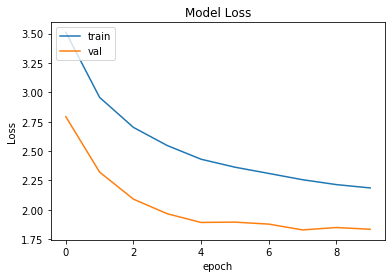

In [113]:
history = h_vgg
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [100]:
scores = model_cnn_vgg.evaluate(X_test,[y_test[:,0:2],y_test[:,2:7],y_test[:,7:12]], batch_size=128)

4742/4742 [==============================] - 409s 86ms/step


In [101]:
scores

[1.8349199119070723,
 0.3085791766643524,
 0.9523941874504089,
 0.5661947131156921,
 0.8658793568611145,
 0.6026992797851562,
 0.8329818844795227]

In [102]:
y_hat_vgg = model_cnn_vgg.predict(X_test)

In [104]:
y_hat_gender = y_hat_vgg[0]

In [105]:
y_hat_age = y_hat_vgg[1]

In [106]:
y_hat_race = y_hat_vgg[2]

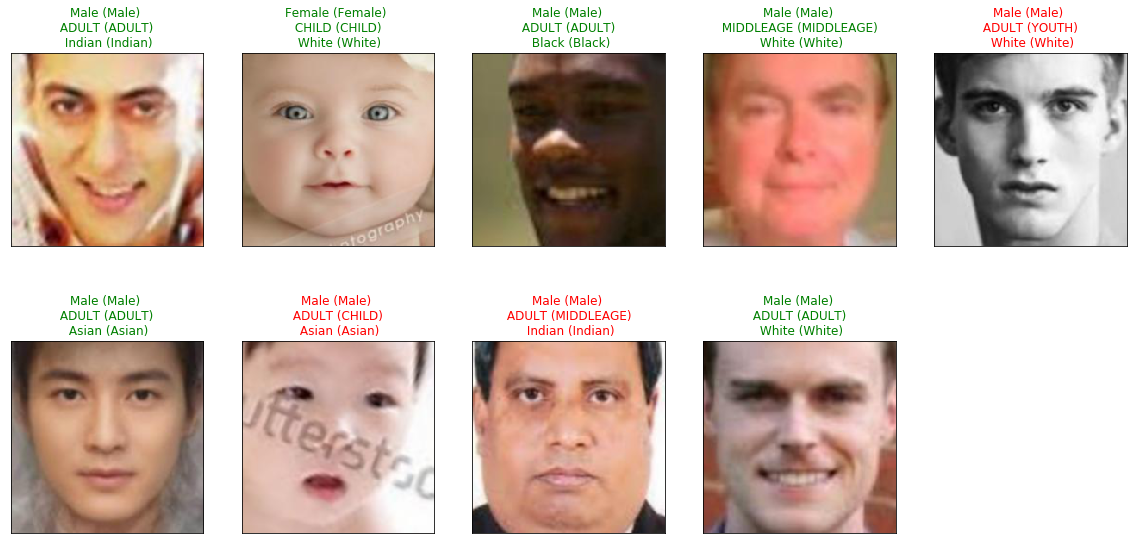

In [112]:
indexes = [500,69,602,100,300,150,23,256,401]
#y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 15))
for i, index in enumerate(indexes):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index_gen = np.argmax(y_hat_gender[index])
    true_index_gen = np.argmax(y_test[index][0:2])
    predict_index_age = np.argmax(y_hat_age[index])
    true_index_age = np.argmax(y_test[index][2:7])
    predict_index_race = np.argmax(y_hat_race[index])
    true_index_race = np.argmax(y_test[index][7:12])
    
    
    # Set the title for each image
    ax.set_title("{} ({}) \n {} ({}) \n {} ({})".format(labels_gender[predict_index_gen], labels_gender[true_index_gen],
                                                  labels_age[predict_index_age],labels_age[true_index_age],
                                                  labels_race[predict_index_race], labels_race[true_index_race]),
                                                    color=("green" if (predict_index_gen == true_index_gen)
                                                                       &(predict_index_age == true_index_age)
                                                                       &(predict_index_race == true_index_race)
                                                                       else "red"))
    
    
    
    